In [1]:
# Import Dependencies
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

### Load and Clean Customer Churn Training and Testing Datasets ###

In [2]:
# Load 'customer_churn_dataset_training_master.csv' Into Pandas DataFrame
customer_churn_training_original = pd.read_csv('Resources/customer_churn_dataset_training_master.csv')
customer_churn_training_original.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
# Check Datatypes For Training DataFrame (Missing One Row (DataFrame Index #199295; CSV Row #204107))
customer_churn_training_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
# Drop Row With Missing Values From Training DataFrame, Check If Succesful
customer_churn_training_original.dropna(inplace=True)
print(customer_churn_training_original.isnull().values.any())

False


In [5]:
# Check Unique Values For Training DataFrame
customer_churn_training_original.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

In [6]:
# Convert Categorical Columns Into Binary, Numerical Format
customer_churn_training = pd.get_dummies(customer_churn_training_original,
                                         columns=['Gender',
                                                  'Subscription Type',
                                                  'Contract Length'],
                                         dtype=float)

# Rename Columns For Clarity, Establish Dictionary Of New Names
new_columns = {'CustomerID': 'customer_id',
               'Age': 'age',
               'Tenure': 'tenure',
               'Usage Frequency': 'usage_frequency',
               'Support Calls': 'support_calls',
               'Payment Delay': 'payment_delay',
               'Total Spend': 'total_spend',
               'Last Interaction': 'last_interaction',
               'Churn': 'churn',
               'Gender_Female': 'female',
               'Gender_Male': 'male',
               'Subscription Type_Basic': 'basic_subscription',
               'Subscription Type_Premium': 'premium_subscription',
               'Subscription Type_Standard': 'standard_subscription',
               'Contract Length_Annual': 'annual_contract',
               'Contract Length_Monthly': 'monthly_contract',
               'Contract Length_Quarterly': 'quarterly_contract'}

# Rename DataFrame Columns
customer_churn_training.rename(columns=new_columns,
                               inplace=True)

# Reorder Columns
customer_churn_training = customer_churn_training[['customer_id',
                                                   'age',
                                                   'female',
                                                   'male',
                                                   'tenure',
                                                   'basic_subscription',
                                                   'standard_subscription',
                                                   'premium_subscription',
                                                   'monthly_contract',
                                                   'quarterly_contract',
                                                   'annual_contract',
                                                   'total_spend',
                                                   'payment_delay',
                                                   'usage_frequency',
                                                   'last_interaction',
                                                   'support_calls',
                                                   'churn']]
customer_churn_training.head()

,customer_id,age,female,male,tenure,basic_subscription,standard_subscription,premium_subscription,monthly_contract,quarterly_contract,annual_contract,total_spend,payment_delay,usage_frequency,last_interaction,support_calls,churn
0,2.0,30.0,1.0,0.0,39.0,0.0,1.0,0.0,0.0,0.0,1.0,932.0,18.0,14.0,17.0,5.0,1.0
1,3.0,65.0,1.0,0.0,49.0,1.0,0.0,0.0,1.0,0.0,0.0,557.0,8.0,1.0,6.0,10.0,1.0
2,4.0,55.0,1.0,0.0,14.0,1.0,0.0,0.0,0.0,1.0,0.0,185.0,18.0,4.0,3.0,6.0,1.0
3,5.0,58.0,0.0,1.0,38.0,0.0,1.0,0.0,1.0,0.0,0.0,396.0,7.0,21.0,29.0,7.0,1.0
4,6.0,23.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,0.0,617.0,8.0,20.0,20.0,5.0,1.0


In [7]:
# Load 'customer_churn_dataset_testing_master.csv' Into Pandas DataFrame
customer_churn_testing_original = pd.read_csv('Resources/customer_churn_dataset_testing_master.csv',
                                     dtype={'CustomerID': float,
                                            'Age': float,
                                            'Tenure': float,
                                            'Usage Frequency': float,
                                            'Support Calls': float,
                                            'Payment Delay': float,
                                            'Total Spend': float,
                                            'Last Interaction': float,
                                            'Churn': float})
customer_churn_testing_original.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [8]:
# Check Datatypes Converted Succesfully For Testing DataFrame
customer_churn_testing_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         64374 non-null  float64
 1   Age                64374 non-null  float64
 2   Gender             64374 non-null  object 
 3   Tenure             64374 non-null  float64
 4   Usage Frequency    64374 non-null  float64
 5   Support Calls      64374 non-null  float64
 6   Payment Delay      64374 non-null  float64
 7   Subscription Type  64374 non-null  object 
 8   Contract Length    64374 non-null  object 
 9   Total Spend        64374 non-null  float64
 10  Last Interaction   64374 non-null  float64
 11  Churn              64374 non-null  float64
dtypes: float64(9), object(3)
memory usage: 5.9+ MB


In [9]:
# Check Unique Values For Testing DataFrame
customer_churn_testing_original.nunique()

CustomerID           64374
Age                     48
Gender                   2
Tenure                  60
Usage Frequency         30
Support Calls           11
Payment Delay           31
Subscription Type        3
Contract Length          3
Total Spend            901
Last Interaction        30
Churn                    2
dtype: int64

In [10]:
# Convert Categorical Columns Into Binary, Numerical Format
customer_churn_testing = pd.get_dummies(customer_churn_testing_original,
                                        columns=['Gender',
                                                  'Subscription Type',
                                                  'Contract Length'],
                                        dtype=float)

# Rename DataFrame Columns
customer_churn_testing.rename(columns=new_columns,
                              inplace=True)

# Reorder Columns
customer_churn_testing = customer_churn_testing[['customer_id',
                                                 'age',
                                                 'female',
                                                 'male',
                                                 'tenure',
                                                 'basic_subscription',
                                                 'standard_subscription',
                                                 'premium_subscription',
                                                 'monthly_contract',
                                                 'quarterly_contract',
                                                 'annual_contract',
                                                 'total_spend',
                                                 'payment_delay',
                                                 'usage_frequency',
                                                 'last_interaction',
                                                 'support_calls',
                                                 'churn']]
customer_churn_testing.head()

,customer_id,age,female,male,tenure,basic_subscription,standard_subscription,premium_subscription,monthly_contract,quarterly_contract,annual_contract,total_spend,payment_delay,usage_frequency,last_interaction,support_calls,churn
0,1.0,22.0,1.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,598.0,27.0,14.0,9.0,4.0,1.0
1,2.0,41.0,1.0,0.0,28.0,0.0,1.0,0.0,1.0,0.0,0.0,584.0,13.0,28.0,20.0,7.0,0.0
2,3.0,47.0,0.0,1.0,27.0,0.0,0.0,1.0,0.0,0.0,1.0,757.0,29.0,10.0,21.0,2.0,0.0
3,4.0,35.0,0.0,1.0,9.0,0.0,0.0,1.0,0.0,1.0,0.0,232.0,17.0,12.0,18.0,5.0,0.0
4,5.0,53.0,1.0,0.0,58.0,0.0,1.0,0.0,0.0,0.0,1.0,533.0,2.0,24.0,18.0,9.0,0.0


In [11]:
# Connect To SQLite Database (Create If Doesn't Exist)
conn = sqlite3.connect('Resources/customer_churn_data.db')

# Write Both DataFrames To SQLite Database Table
customer_churn_training.to_sql('customer_churn_training',
                               conn,
                               if_exists='replace',
                               index=False)
customer_churn_testing.to_sql('customer_churn_testing',
                              conn,
                              if_exists='replace',
                              index=False)

# Close Database Connection
conn.close()

### Data Exploration ###

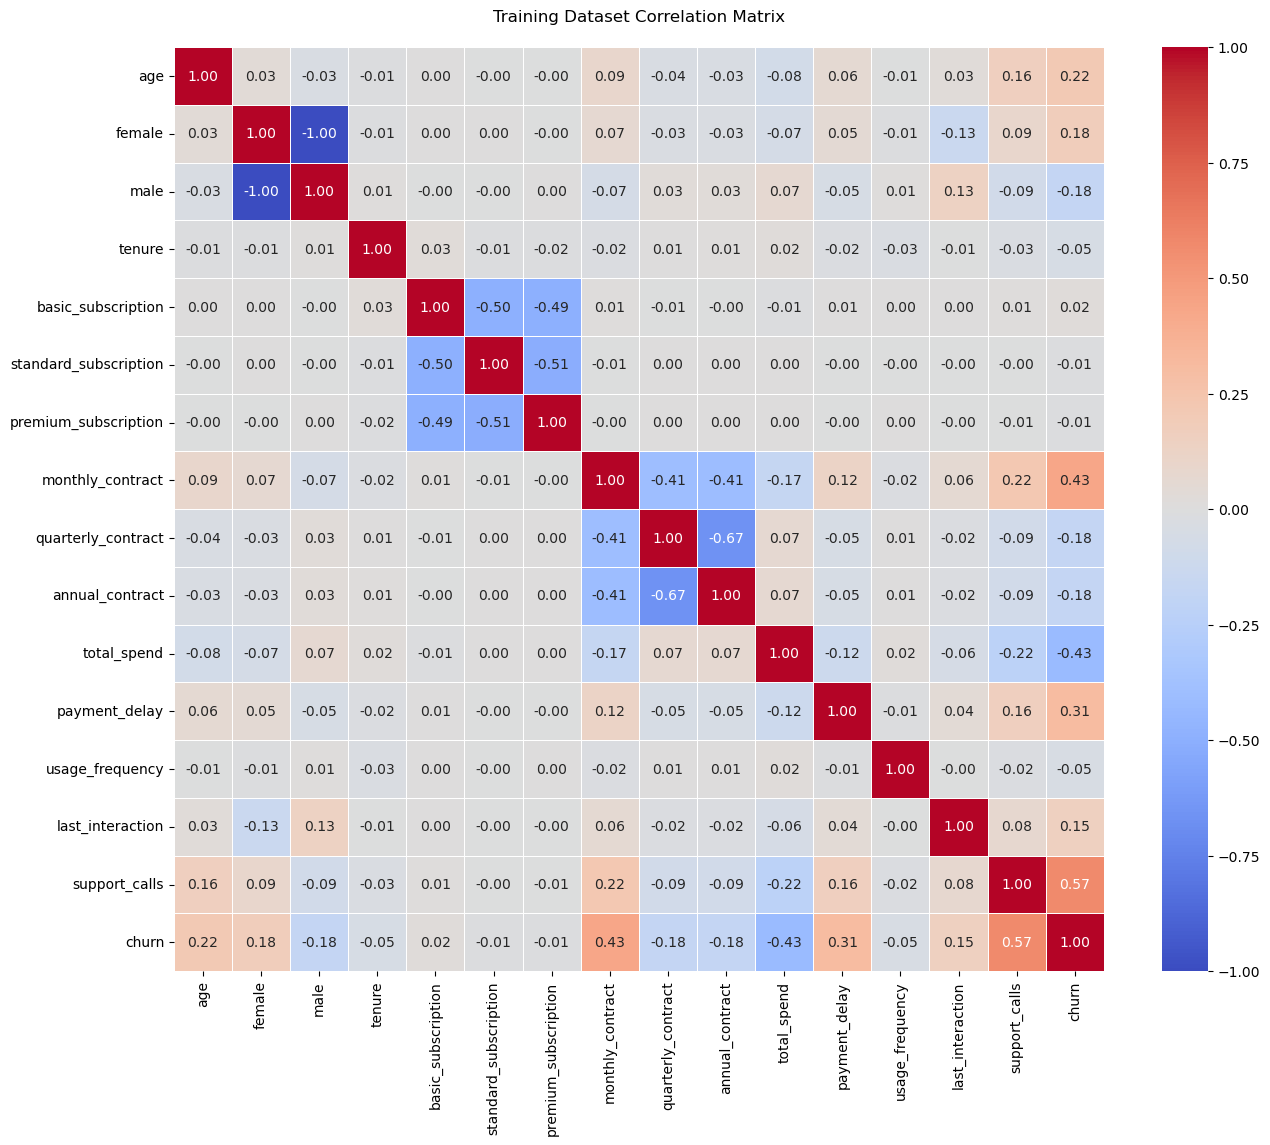

In [12]:
# Create 'customer_churn_training' DataFrame Copy For Training Correlation Matrix
customer_churn_training_copy = customer_churn_training.copy()
del customer_churn_training_copy['customer_id']

# Calculate Correlation Matrix
customer_churn_training_heatmap = customer_churn_training_copy.corr()

# Conditional Formatting Of Correlation Matrix, Easier To Read
plt.figure(figsize=(15, 12))
plt.title('Training Dataset Correlation Matrix\n')
sns.heatmap(customer_churn_training_heatmap,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=.5)

# Save Figure To Output Directory
plt.savefig('Output/training_correlation_matrix.png',
            bbox_inches='tight')

# Display Correlation Matrix
plt.show()

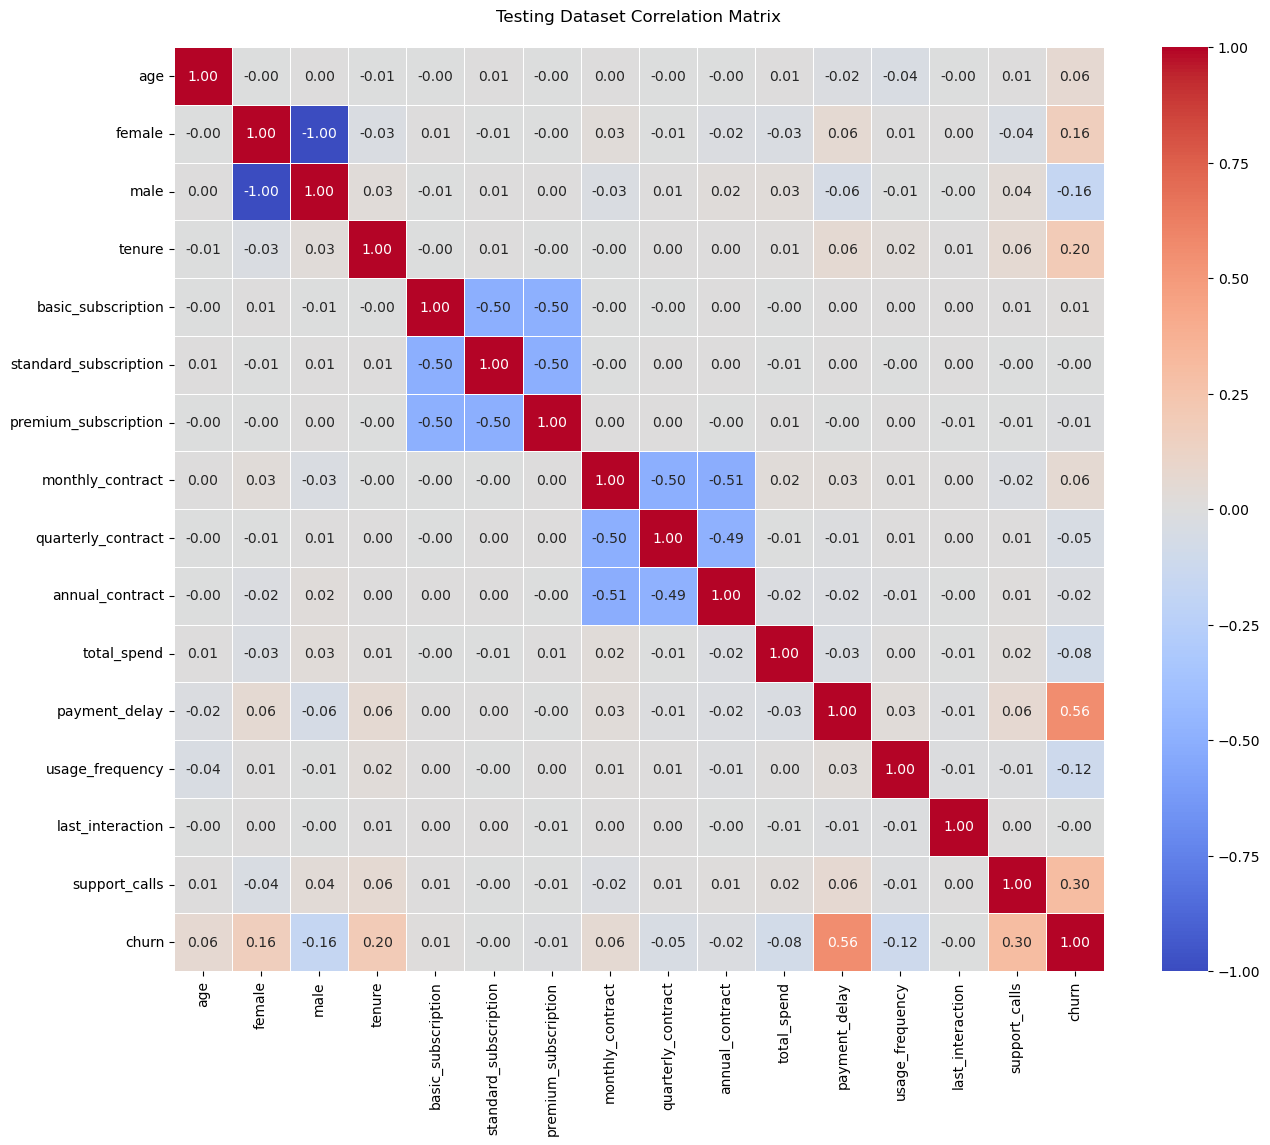

In [13]:
# Create 'customer_churn_testing' DataFrame Copy For Testing Correlation Matrix
customer_churn_testing_copy = customer_churn_testing.copy()
del customer_churn_testing_copy['customer_id']

# Calculate Correlation Matrix
customer_churn_testing_heatmap = customer_churn_testing_copy.corr()

# Conditional Formatting Of Correlation Matrix, Easier To Read
plt.figure(figsize=(15, 12))
plt.title('Testing Dataset Correlation Matrix\n')
sns.heatmap(customer_churn_testing_heatmap,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=.5)

# Save Figure To Output Directory
plt.savefig('Output/testing_correlation_matrix.png',
            bbox_inches='tight')

# Display Correlation Matrix
plt.show()